Текущее количество клиентов: 8715
Планируется привлечь 1000 новых клиентов
Стоимость привлечения одного клиента: 15000 руб
Средняя прибыль от одного клиента: 15407 руб


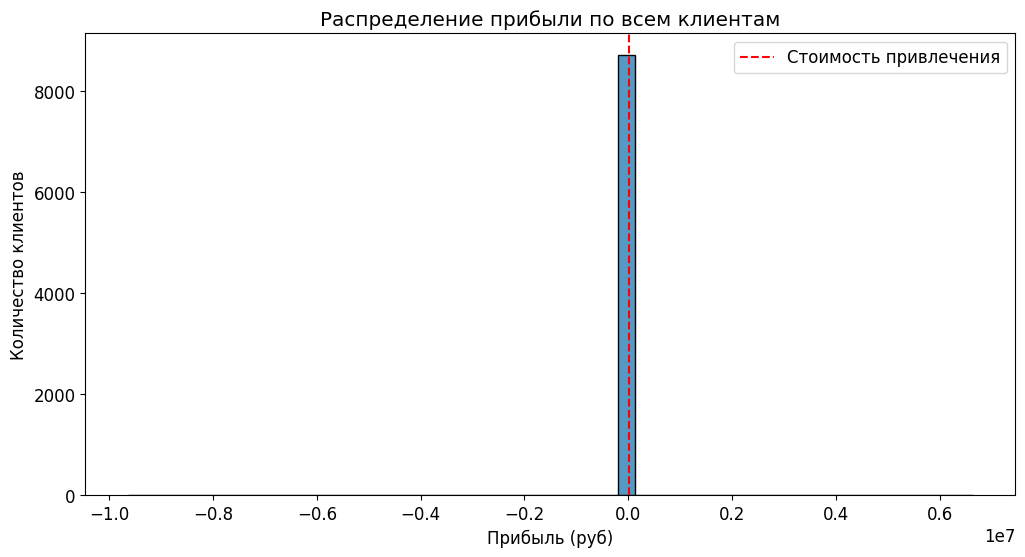

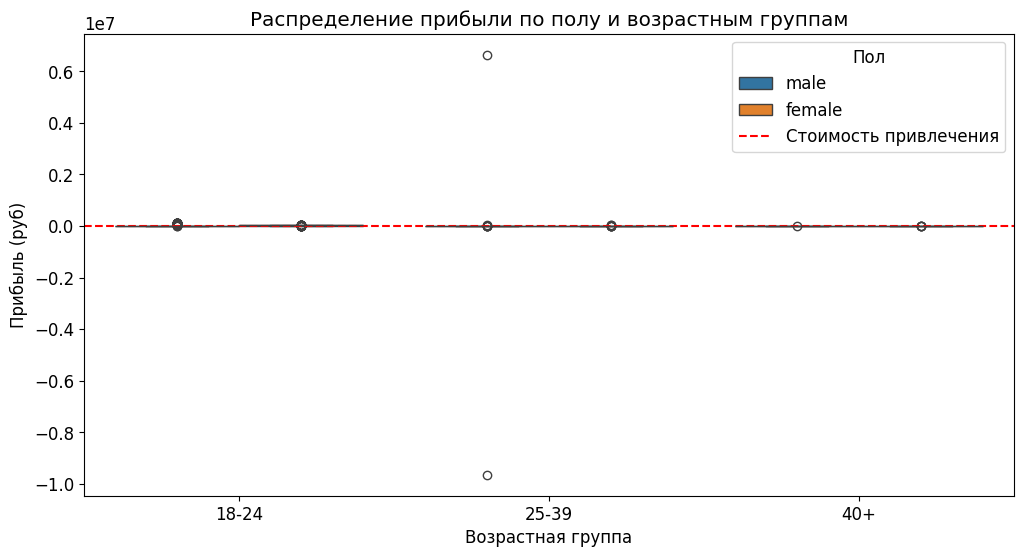

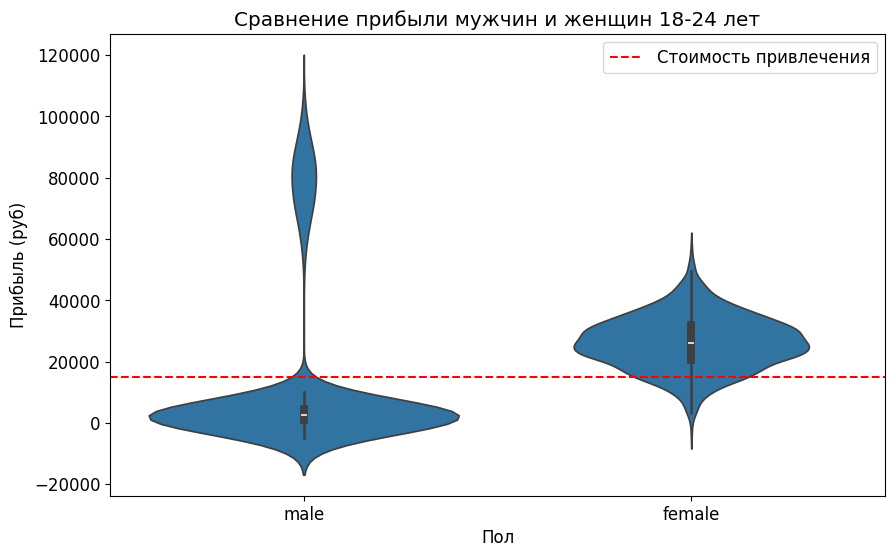

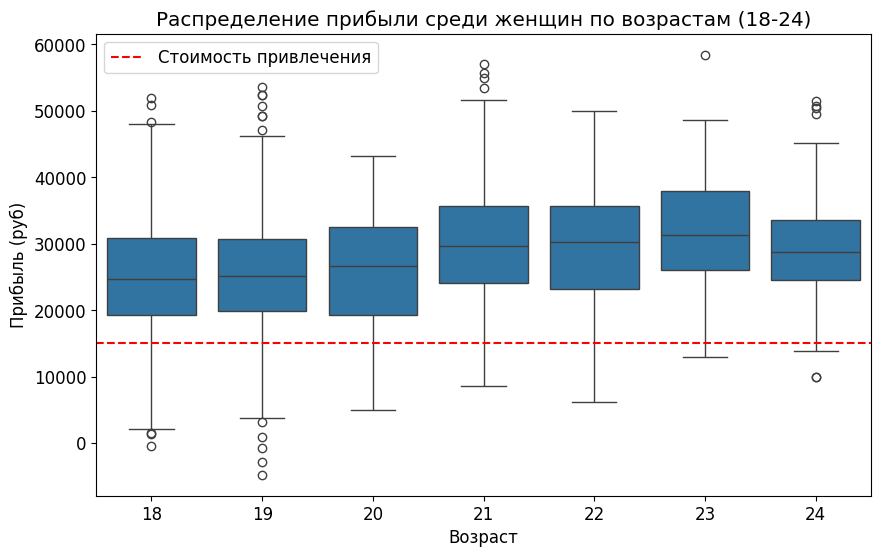

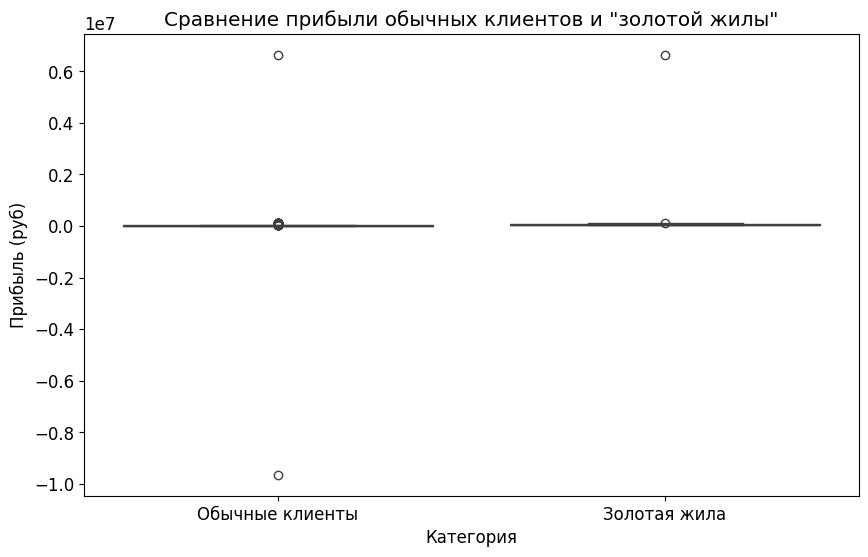


P-value: 0.765
Нет статистических доказательств прибыльности привлечения без таргетирования

Средняя прибыль от мужчин 18-24 лет: 13156 руб
Средняя прибыль от женщин 18-24 лет: 26278 руб
P-value: 0.000
Есть значимая разница между категориями
Рекомендуемая категория для таргетирования: Женщины 18-24
Привлечение женщин 18-24 лет прибыльно, p-value: 0.000

Средняя прибыль от женщин 18-21 лет: 25717 руб
Средняя прибыль от женщин 22-24 лет: 29891 руб
P-value: 0.000
Есть значимая разница между подкатегориями
Привлечение женщин 18-21 лет прибыльно
Привлечение женщин 22-24 лет прибыльно

При сравнении 210 пар подкатегорий по годам:
- Уровень значимости нужно снизить до 0.002 (коррекция на множественное тестирование)
- Для сохранения мощности в 80% нужно увеличить размер выборки до 920 на подкатегорию

Средняя прибыль в 'золотой жиле': 48061 руб
P-value: 0.000
'Золотая жила' значимо прибыльнее категории 'Женщины 18-24'

Минимальный эффект, чтобы 'Мужчины 18 лет' отличались от стоимости привлеч

/home/rlohaw/Projects/Cases/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [9]:
# Импорт библиотек
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from statsmodels.stats.power import TTestIndPower

# Загрузка данных
data = pd.read_csv('https://raw.githubusercontent.com/zalig/cu-datasets/main/golden_mine.csv')
data['Gender'] = data['Gender'].map(lambda x: str(x).lower() if pd.notnull(x) else x)

# Функция для создания графиков
def create_visualizations(data):
    # Настройка стиля графиков
    plt.rcParams['figure.figsize'] = (12, 8)
    plt.rcParams['font.size'] = 12
    
    # 1. Общее распределение прибыли
    plt.figure(figsize=(12, 6))
    sns.histplot(data['Profit'], bins=50)
    plt.title('Распределение прибыли по всем клиентам')
    plt.xlabel('Прибыль (руб)')
    plt.ylabel('Количество клиентов')
    plt.axvline(new_client_cost, color='red', linestyle='--', label='Стоимость привлечения')
    plt.legend()
    plt.show()
    
    # 2. Сравнение прибыли по полу и возрастной группе
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='AgeGroup', y='Profit', hue='Gender', data=data)
    plt.title('Распределение прибыли по полу и возрастным группам')
    plt.xlabel('Возрастная группа')
    plt.ylabel('Прибыль (руб)')
    plt.axhline(new_client_cost, color='red', linestyle='--', label='Стоимость привлечения')
    plt.legend(title='Пол')
    plt.show()
    
    # 3. Сравнение категорий 18-24
    plt.figure(figsize=(10, 6))
    data_18_24 = data[data['AgeGroup'] == '18-24']
    sns.violinplot(x='Gender', y='Profit', data=data_18_24)
    plt.title('Сравнение прибыли мужчин и женщин 18-24 лет')
    plt.xlabel('Пол')
    plt.ylabel('Прибыль (руб)')
    plt.axhline(new_client_cost, color='red', linestyle='--', label='Стоимость привлечения')
    plt.legend()
    plt.show()
    
    # 4. Детальный анализ женщин 18-24
    women_18_24 = data[(data['Gender'] == 'female') & (data['Age'].between(18, 24))]
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Age', y='Profit', data=women_18_24)
    plt.title('Распределение прибыли среди женщин по возрастам (18-24)')
    plt.xlabel('Возраст')
    plt.ylabel('Прибыль (руб)')
    plt.axhline(new_client_cost, color='red', linestyle='--', label='Стоимость привлечения')
    plt.legend()
    plt.show()
    
    # 5. Сравнение с "золотой жилой"
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Category', y='Profit', data=pd.DataFrame({
        'Category': ['Обычные клиенты'] * len(data) + ['Золотая жила'] * len(data[data['Profit'] > 25000]),
        'Profit': list(data['Profit']) + list(data[data['Profit'] > 25000]['Profit'])
    }))
    plt.title('Сравнение прибыли обычных клиентов и "золотой жилы"')
    plt.xlabel('Категория')
    plt.ylabel('Прибыль (руб)')
    plt.show()

# Текущая ситуация (оставляем весь ваш код без изменений)
num_clients = len(data)
new_clients = 1000 
new_client_cost = 15000
profit_per_client = data['Profit'].mean()

print(f"Текущее количество клиентов: {num_clients}")  
print(f"Планируется привлечь {new_clients} новых клиентов")
print(f"Стоимость привлечения одного клиента: {new_client_cost} руб")
print(f"Средняя прибыль от одного клиента: {profit_per_client:.0f} руб")

# Создание визуализаций
create_visualizations(data)

# Проверка значимости прибыльности без таргетирования
_, p_value = ttest_ind(data['Profit'], [new_client_cost] * num_clients)
alpha = 0.05
print(f"\nP-value: {p_value:.3f}")

if p_value < alpha:
    print("Привлечение клиентов без таргетирования прибыльно")
    print(f"Ожидаемая прибыль: {(profit_per_client - new_client_cost)*new_clients:.0f} руб")
else:
    print("Нет статистических доказательств прибыльности привлечения без таргетирования")

# Сравнение категорий "Мужчины 18-24" и "Женщины 18-24"  
men_18_24 = data[(data['Gender'] == 'male') & (data['AgeGroup'] == '18-24')]
women_18_24 = data[(data['Gender'] == 'female') & (data['AgeGroup'] == '18-24')]

men_profit = men_18_24['Profit'].mean()
women_profit = women_18_24['Profit'].mean()

print(f"\nСредняя прибыль от мужчин 18-24 лет: {men_profit:.0f} руб") 
print(f"Средняя прибыль от женщин 18-24 лет: {women_profit:.0f} руб")
    
_, p_value = ttest_ind(men_18_24['Profit'], women_18_24['Profit'])
print(f"P-value: {p_value:.3f}")

if p_value < alpha:
    print("Есть значимая разница между категориями")
    if men_profit > women_profit:
        target = 'Мужчины 18-24'
    else:
        target = 'Женщины 18-24'
else:
    print("Нет значимой разницы, выбираем категорию с большей прибылью")
    target = 'Женщины 18-24' if women_profit > men_profit else 'Мужчины 18-24'
        
print(f"Рекомендуемая категория для таргетирования: {target}")

_, p_men = ttest_ind(men_18_24['Profit'], [new_client_cost] * len(men_18_24))  
_, p_women = ttest_ind(women_18_24['Profit'], [new_client_cost] * len(women_18_24))

if target == 'Мужчины 18-24':
    if p_men < alpha:
        print(f"Привлечение мужчин 18-24 лет прибыльно, p-value: {p_men:.3f}")
    else:
        print(f"Привлечение мужчин 18-24 лет не прибыльно, p-value: {p_men:.3f}") 
else:
    if p_women < alpha:  
        print(f"Привлечение женщин 18-24 лет прибыльно, p-value: {p_women:.3f}")
    else:
        print(f"Привлечение женщин 18-24 лет не прибыльно, p-value: {p_women:.3f}")

# Сравнение категорий "Женщины 18-21" и "Женщины 22-24"
women_18_21 = data[(data['Gender'] == 'female') & (data['Age'].between(18, 21))]  
women_22_24 = data[(data['Gender'] == 'female') & (data['Age'].between(22, 24))]

profit_18_21 = women_18_21['Profit'].mean()  
profit_22_24 = women_22_24['Profit'].mean()

print(f"\nСредняя прибыль от женщин 18-21 лет: {profit_18_21:.0f} руб")
print(f"Средняя прибыль от женщин 22-24 лет: {profit_22_24:.0f} руб")  

_, p_value = ttest_ind(women_18_21['Profit'], women_22_24['Profit'])  
print(f"P-value: {p_value:.3f}")

if p_value < alpha:
    print("Есть значимая разница между подкатегориями") 
    if profit_18_21 > new_client_cost:
        print("Привлечение женщин 18-21 лет прибыльно")
    else:  
        print("Привлечение женщин 18-21 лет не прибыльно")
        
    if profit_22_24 > new_client_cost:
        print("Привлечение женщин 22-24 лет прибыльно") 
    else:
        print("Привлечение женщин 22-24 лет не прибыльно")
else:
    print("Нет значимой разницы между подкатегориями")

# Влияние уровня значимости и мощности на сравнение подкатегорий по годам 
alpha = 0.05 / 21  # Коррекция на множественное тестирование
analysis = TTestIndPower()
power = 0.8
effect = 1600  # Примерный эффект между подкатегориями в 1600 руб

n = analysis.solve_power(effect_size=effect/women_18_24['Profit'].std(),
                        alpha=alpha, power=power, nobs1=None)
print(f"\nПри сравнении {21*20//2} пар подкатегорий по годам:")
print("- Уровень значимости нужно снизить до {:.3f} (коррекция на множественное тестирование)".format(alpha))
print("- Для сохранения мощности в 80% нужно увеличить размер выборки до {:.0f} на подкатегорию".format(n))
        
# Сравнение с "золотой жилой" 
gold_mine = data[data['Profit'] > 25000]
gold_profit = gold_mine['Profit'].mean()  

print(f"\nСредняя прибыль в 'золотой жиле': {gold_profit:.0f} руб")

_, p_value = ttest_ind(gold_mine['Profit'], women_18_24['Profit'])
print(f"P-value: {p_value:.3f}")

if p_value < alpha:
    print("'Золотая жила' значимо прибыльнее категории 'Женщины 18-24'")
else:
    print("Нет значимой разницы между 'золотой жилой' и 'Женщины 18-24'")
    
# Минимальный детектируемый эффект для "Мужчины 18 лет"
men_18 = data[(data['Gender'] == 'male') & (data['Age'] == 18)]

analysis = TTestIndPower()
power = 0.8
sample_size = len(men_18)

effect_size = analysis.solve_power(nobs1=sample_size, alpha=alpha, power=power)
# Исправлено: убрано обращение по индексу к effect_size
mde_18 = effect_size * men_18['Profit'].std()
print(f"\nМинимальный эффект, чтобы 'Мужчины 18 лет' отличались от стоимости привлечения: {mde_18:.0f} руб")

# Минимальный детектируемый эффект для серии тестов
analysis = TTestIndPower()  
power = 0.8
sample_size = len(men_18_24) // 7  # Размер выборки для каждого возраста
alpha_corr = alpha / 7  # Коррекция на множественное сравнение 

effect_size = analysis.solve_power(nobs1=sample_size, alpha=alpha_corr, power=power)  
# Исправлено: убрано обращение по индексу к effect_size
mde_series = effect_size * men_18_24['Profit'].std()

print("\nМинимальный эффект, чтобы хотя бы одна категория от 18 до 24 лет значимо отличалась от средней:")
print(f"{mde_series:.0f} руб (с учетом коррекции на множественное сравнение)")

# PRESENTATION
https://docs.google.com/presentation/d/1XmNwfALhabwOIlBoY64Ml_RQSqlj6e9K3_ni-icDdKE/edit?usp=sharing